In [1]:
%matplotlib inline
import os
import requests
import tempfile
import matplotlib.pyplot as plt
import numpy
import scipy


r= requests.get('http://localhost/download/tmpSz_gTT/MODIS_MSS_Contrast-MOD02QKM.A2010091.1630_MSS.npy')
if r.ok:
    
    #create unique file
    fd, path = tempfile.mkstemp(dir='/tmp')
    os.close(fd)
    
    with open(path, 'wb') as f:
        f.write(r.content)
    with open(path, 'rb') as f:
        d = numpy.load(f)
    os.unlink(path)
d1 = d

In [2]:
r= requests.get('http://localhost/download/tmpSz_gTT/MODIS_MSS_Contrast-MYD02QKM.A2010091.1805_MSS.npy')
if r.ok:
    
    #create unique file
    fd, path = tempfile.mkstemp(dir='/tmp')
    os.close(fd)
    
    with open(path, 'wb') as f:
        f.write(r.content)
    with open(path, 'rb') as f:
        d = numpy.load(f)
    os.unlink(path)
d2 = d

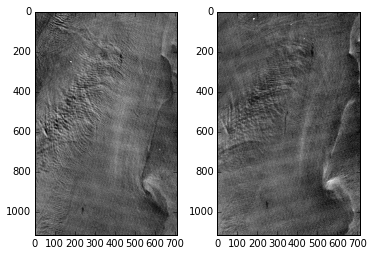

In [3]:
plt.subplot(1,2,1)
plt.imshow(d1[:,:,0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(d2[:,:,0],cmap='gray')

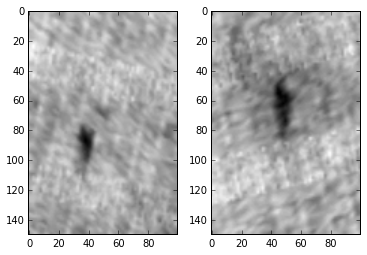

In [4]:
plt.subplot(1,2,1)
plt.imshow(d1[900:1050,200:300,0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(d2[900:1050,200:300,0],cmap='gray')

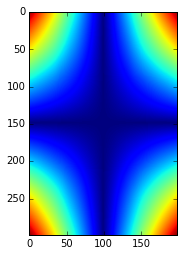

In [5]:
from scipy import signal
from numpy.fft import fftshift
corr = signal.fftconvolve(1./d1[900:1050,200:300,0],1./d2[900:1050,200:300,0])
c = fftshift(corr)
plt.imshow(c)

(0.95884551086783487, 1.0653839009642609)

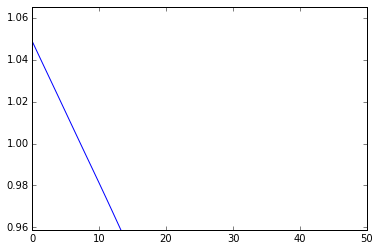

In [6]:
numpy.where(c == numpy.amax(c))
plt.plot(c[:,0])
plt.xlim(0,50)
plt.ylim(numpy.amax(c)*0.9,numpy.amax(c))